In [115]:
#load data
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels

df = pd.read_csv("clean_df.csv")
df


,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY,VIX,10Y Treasury,Gold,Oil,EUR_USD
0,BTCB_4023,2020-09-24,10475.684721,1.138708e+04,0.000000e+00,9,24,3,1,-0.010546,1.915524,0.039526,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
1,BTCB_4023,2020-09-25,10889.743248,1.384086e+03,0.000000e+00,9,25,4,1,0.039526,-0.878451,-0.029131,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2,BTCB_4023,2020-09-26,10572.518703,3.690903e+03,0.000000e+00,9,26,5,0,-0.029131,1.666671,0.019034,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
3,BTCB_4023,2020-09-27,10773.752004,6.771302e+03,0.000000e+00,9,27,6,0,0.019034,0.834592,0.006752,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
4,BTCB_4023,2020-09-28,10846.499092,3.646642e+03,0.000000e+00,9,28,0,1,0.006752,-0.461456,-0.013387,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19287,FTT_4195,2022-09-29,24.068050,7.976498e+07,3.224523e+09,9,29,3,1,0.015881,-0.219820,0.009143,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
19288,FTT_4195,2022-09-30,24.288116,7.723532e+07,3.254006e+09,9,30,4,1,0.009143,-0.031714,-0.002232,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
19289,FTT_4195,2022-10-01,24.233912,7.605522e+07,3.246744e+09,10,1,5,0,-0.002232,-0.015279,0.000811,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
19290,FTT_4195,2022-10-02,24.253569,4.738931e+07,3.249378e+09,10,2,6,0,0.000811,-0.376909,-0.007096,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [116]:
df.set_index(['symbol_id', 'time_close'],inplace = True)
df

close        volume     marketcap  month  day  \
symbol_id time_close                                                         
BTCB_4023 2020-09-24  10475.684721  1.138708e+04  0.000000e+00      9   24   
          2020-09-25  10889.743248  1.384086e+03  0.000000e+00      9   25   
          2020-09-26  10572.518703  3.690903e+03  0.000000e+00      9   26   
          2020-09-27  10773.752004  6.771302e+03  0.000000e+00      9   27   
          2020-09-28  10846.499092  3.646642e+03  0.000000e+00      9   28   
...                            ...           ...           ...    ...  ...   
FTT_4195  2022-09-29     24.068050  7.976498e+07  3.224523e+09      9   29   
          2022-09-30     24.288116  7.723532e+07  3.254006e+09      9   30   
          2022-10-01     24.233912  7.605522e+07  3.246744e+09     10    1   
          2022-10-02     24.253569  4.738931e+07  3.249378e+09     10    2   
          2022-10-03     24.081476  3.903657e+07  3.226322e+09     10    3   

                      weekday  day of week  price change  volume change  \
symbol_id time_close                                                      
BTCB_4023 2020-09-24        3            1     -0.010546       1.915524   
          2020-09-25        4            1      0.039526      -0.878451   
          2020-09-26        5            0     -0.029131       1.666671   
          2020-09-27        6            0      0.019034       0.834592   
          2020-09-28        0            1      0.006752      -0.461456   
...                       ...          ...           ...            ...   
FTT_4195  2022-09-29        3            1      0.015881      -0.219820   
          2022-09-30        4            1      0.009143      -0.031714   
          2022-10-01        5            0     -0.002232      -0.015279   
          2022-10-02        6            0      0.000811      -0.376909   
          2022-10-03        0            1     -0.007096      -0.176258   

                      tomorrow change         SPY        VIX  10Y Treasury  \
symbol_id time_close                                                         
BTCB_4023 2020-09-24         0.039526  314.251007  28.510000         0.666   
          2020-09-25        -0.029131  319.331482  26.379999         0.659   
          2020-09-26         0.019034  319.331482  26.379999         0.659   
          2020-09-27         0.006752  319.331482  26.379999         0.659   
          2020-09-28        -0.013387  324.635376  26.190001         0.663   
...                               ...         ...        ...           ...   
FTT_4195  2022-09-29         0.009143  362.790009  31.840000         3.747   
          2022-09-30        -0.002232  357.179993  31.620001         3.804   
          2022-10-01         0.000811  357.179993  31.620001         3.804   
          2022-10-02        -0.007096  357.179993  31.620001         3.804   
          2022-10-03         0.024955  357.179993  31.620001         3.804   

                             Gold        Oil   EUR_USD  
symbol_id time_close                                    
BTCB_4023 2020-09-24  1868.300049  40.310001  1.165854  
          2020-09-25  1857.699951  40.250000  1.167324  
          2020-09-26  1857.699951  40.250000  1.167324  
          2020-09-27  1857.699951  40.250000  1.167324  
          2020-09-28  1872.800049  40.599998  1.163535  
...                           ...        ...       ...  
FTT_4195  2022-09-29  1658.500000  81.230003  0.970817  
          2022-09-30  1662.400024  79.489998  0.982956  
          2022-10-01  1662.400024  79.489998  0.982956  
          2022-10-02  1662.400024  79.489998  0.982956  
          2022-10-03  1662.400024  79.489998  0.979269  

[19292 rows x 16 columns]

In [117]:
xpr = df.loc['XRP_52']
xpr

,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY,VIX,10Y Treasury,Gold,Oil,EUR_USD
time_close,,,,,,,,,,,,,,,,
2020-09-24,0.222924,1.676911e+09,1.005329e+10,9,24,3,1,-0.045198,-0.050177,0.040102,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
2020-09-25,0.231864,1.894452e+09,1.045644e+10,9,25,4,1,0.040102,0.129727,0.049036,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-26,0.243233,1.809125e+09,1.096918e+10,9,26,5,0,0.049036,-0.045041,-0.000456,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-27,0.243122,1.553187e+09,1.096418e+10,9,27,6,0,-0.000456,-0.141471,0.005170,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-28,0.244379,1.424797e+09,1.102087e+10,9,28,0,1,0.005170,-0.082662,-0.007553,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.447573,2.661456e+09,2.233421e+10,9,29,3,1,0.004518,-0.044092,0.073597,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
2022-09-30,0.480514,3.505904e+09,2.397795e+10,9,30,4,1,0.073597,0.317288,-0.010923,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
2022-10-01,0.475265,1.032952e+10,2.371604e+10,10,1,5,0,-0.010923,1.946322,-0.000385,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [118]:
#add other coins to the dataframe
ETH = df.loc['ETH_1027']
ETH.rename(columns = {'close':'ETH_close'}, inplace = True)
ETH_close = ETH["ETH_close"]
ETH_close

BTC = df.loc['BTC_1']
BTC.rename(columns = {'close':'BTC_close'}, inplace = True)
BTC_close = BTC["BTC_close"]
BTC_close

DOGE = df.loc['DOGE_74']
DOGE.rename(columns = {'close':'DOGE_close'}, inplace = True)
DOGE_close = DOGE["DOGE_close"]
DOGE_close

c_xpr = pd.concat([xpr, ETH_close, BTC_close, DOGE_close],axis=1)
c_xpr

/tmp/ipykernel_181/2961906613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETH.rename(columns = {'close':'ETH_close'}, inplace = True)
/tmp/ipykernel_181/2961906613.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC.rename(columns = {'close':'BTC_close'}, inplace = True)
/tmp/ipykernel_181/2961906613.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DOGE.rename(columns = {'close':'DOGE_close'}, inplace = True)


,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY,VIX,10Y Treasury,Gold,Oil,EUR_USD,ETH_close,BTC_close,DOGE_close
time_close,,,,,,,,,,,,,,,,,,,
2020-09-24,0.222924,1.676911e+09,1.005329e+10,9,24,3,1,-0.045198,-0.050177,0.040102,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854,322.801017,10295.054804,0.002575
2020-09-25,0.231864,1.894452e+09,1.045644e+10,9,25,4,1,0.040102,0.129727,0.049036,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,348.029329,10773.534000,0.002629
2020-09-26,0.243233,1.809125e+09,1.096918e+10,9,26,5,0,0.049036,-0.045041,-0.000456,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,351.552190,10668.141934,0.002701
2020-09-27,0.243122,1.553187e+09,1.096418e+10,9,27,6,0,-0.000456,-0.141471,0.005170,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324,359.182175,10769.604523,0.002722
2020-09-28,0.244379,1.424797e+09,1.102087e+10,9,28,0,1,0.005170,-0.082662,-0.007553,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535,358.283277,10881.984006,0.002736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.447573,2.661456e+09,2.233421e+10,9,29,3,1,0.004518,-0.044092,0.073597,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817,1333.964086,19445.124438,0.060484
2022-09-30,0.480514,3.505904e+09,2.397795e+10,9,30,4,1,0.073597,0.317288,-0.010923,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,1336.776474,19532.627889,0.060628
2022-10-01,0.475265,1.032952e+10,2.371604e+10,10,1,5,0,-0.010923,1.946322,-0.000385,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956,1327.829013,19400.000434,0.062382


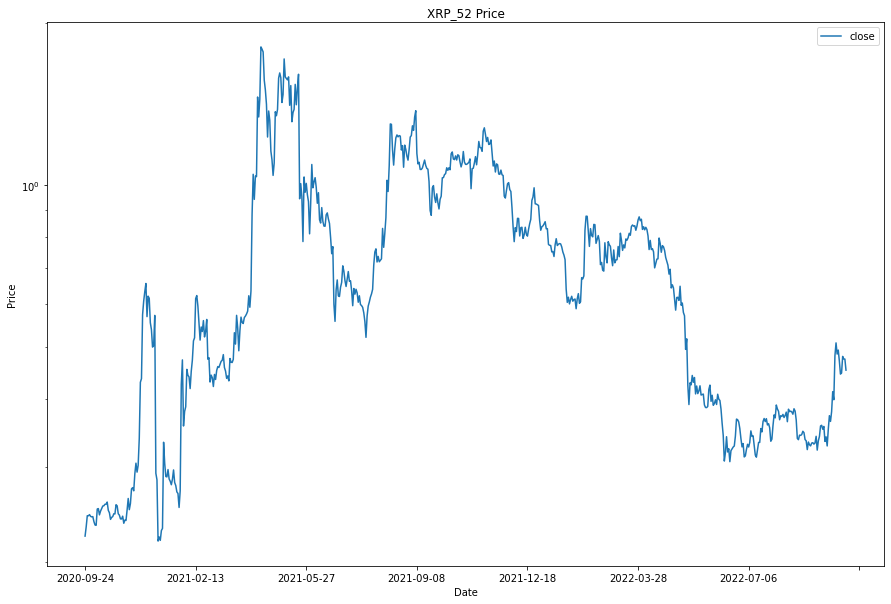

In [119]:
#Time Series plot
c_xpr.plot(y=['close'], logy=True, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XRP_52 Price')
plt.show()

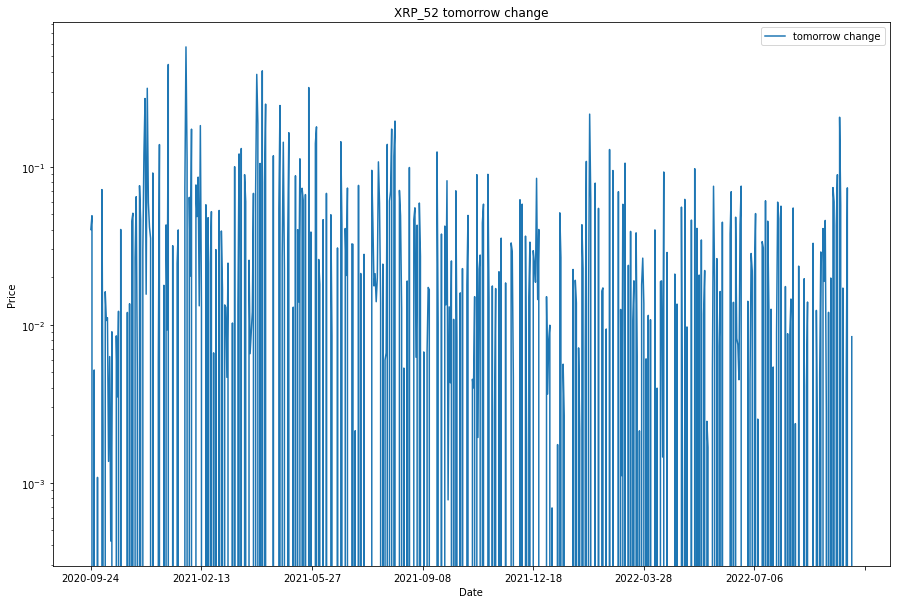

In [120]:
c_xpr.plot(y=['tomorrow change'], logy=True, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XRP_52 tomorrow change')
plt.show()

ADF Statistic: -14.222544
p-value: 0.000000


ADF Statistic: -25.783636
p-value: 0.000000


ADF Statistic: -2.300683
p-value: 0.171748


ADF Statistic: -4.320312
p-value: 0.000410


ADF Statistic: 0.307875
p-value: 0.977703


ADF Statistic: -2.125103
p-value: 0.234541


ADF Statistic: -1.902342
p-value: 0.330960


ADF Statistic: 0.643501
p-value: 0.988640


ADF Statistic: -1.936253
p-value: 0.315203


ADF Statistic: -1.734784
p-value: 0.413286


ADF Statistic: -2.294981
p-value: 0.173592




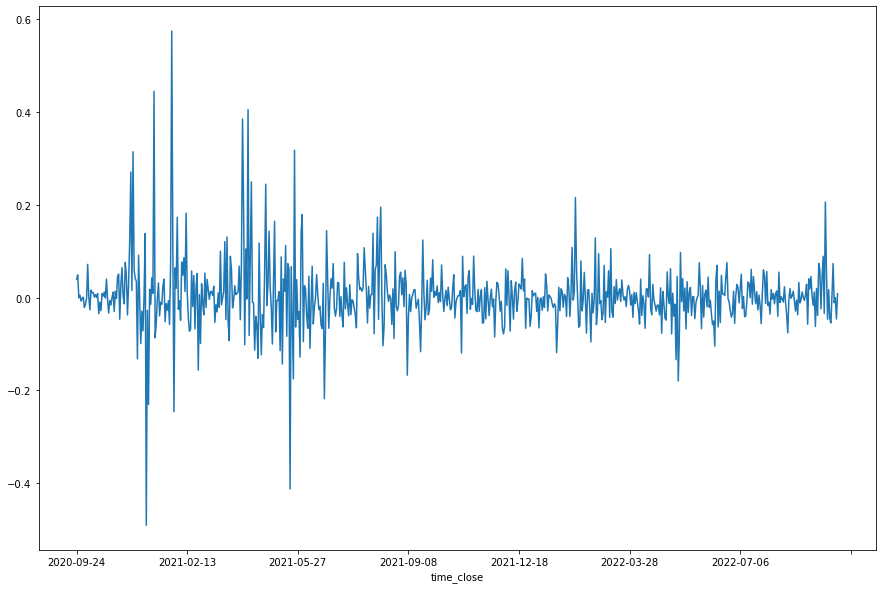

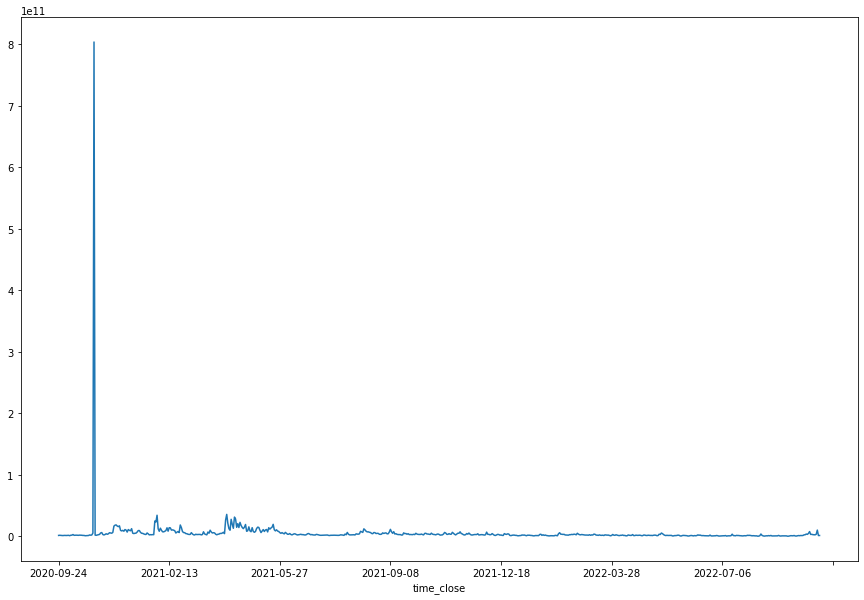

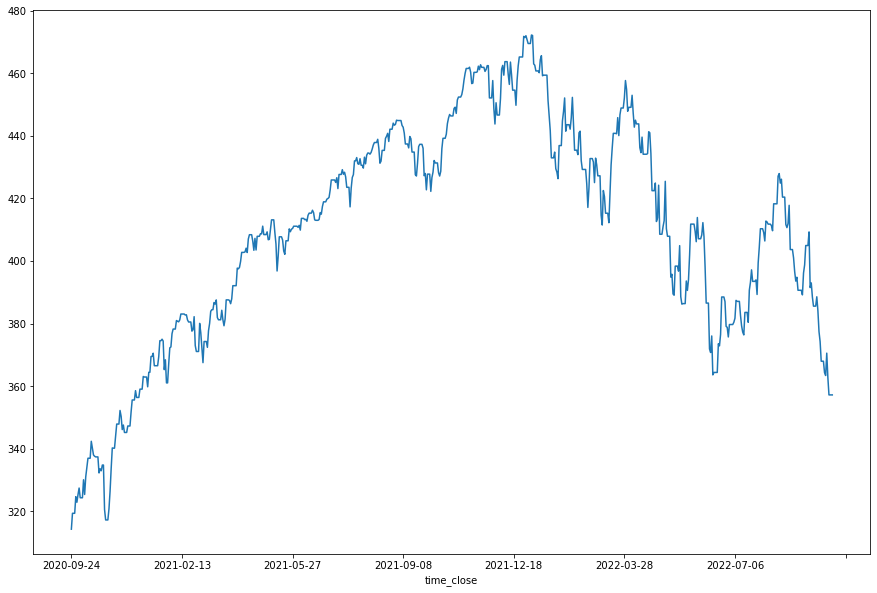

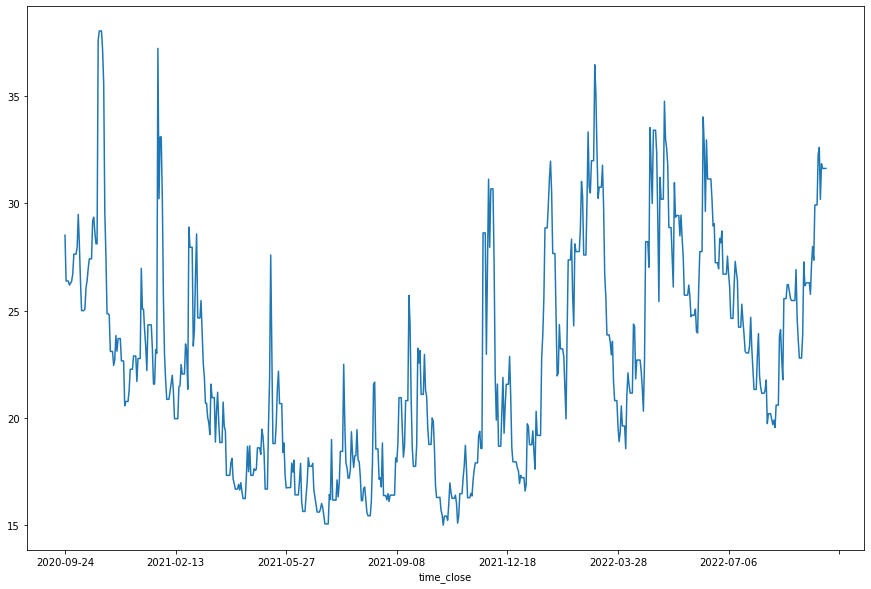

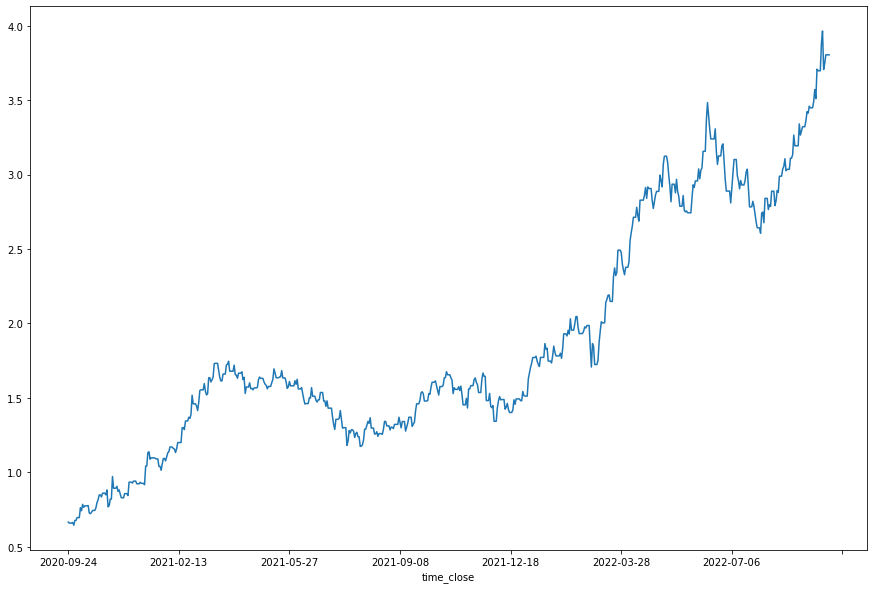

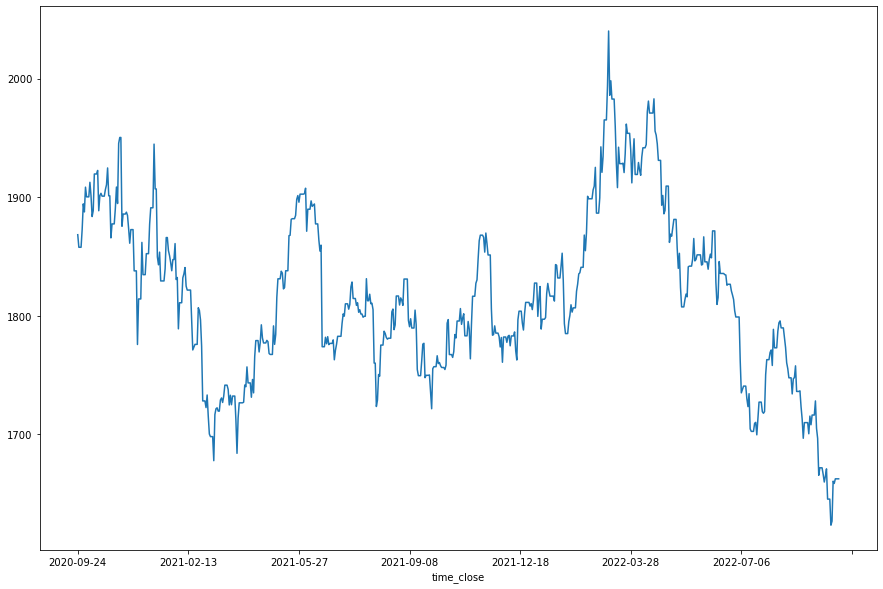

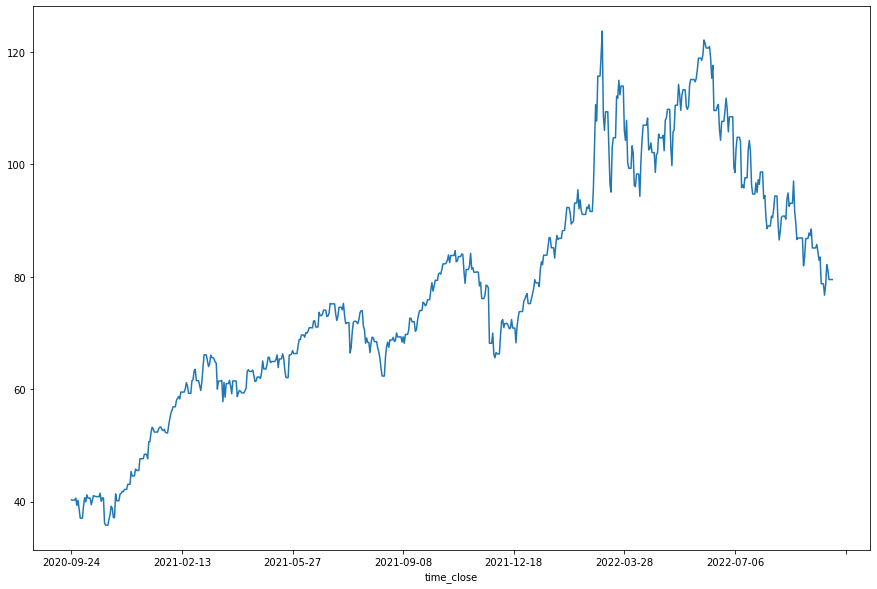

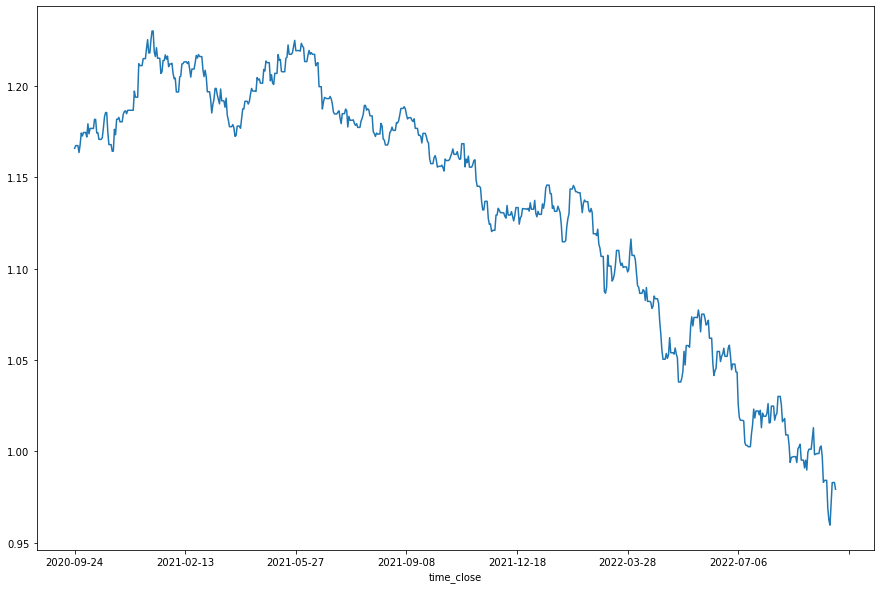

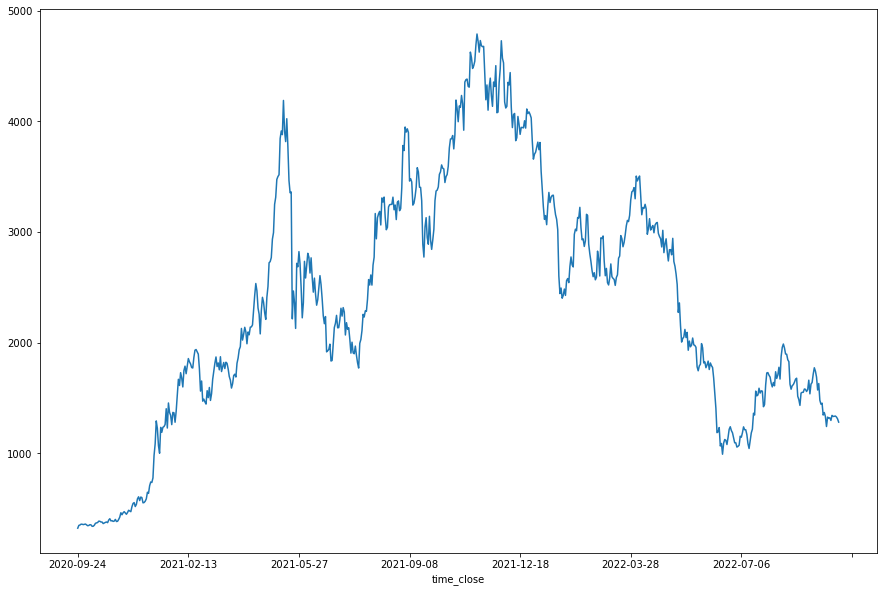

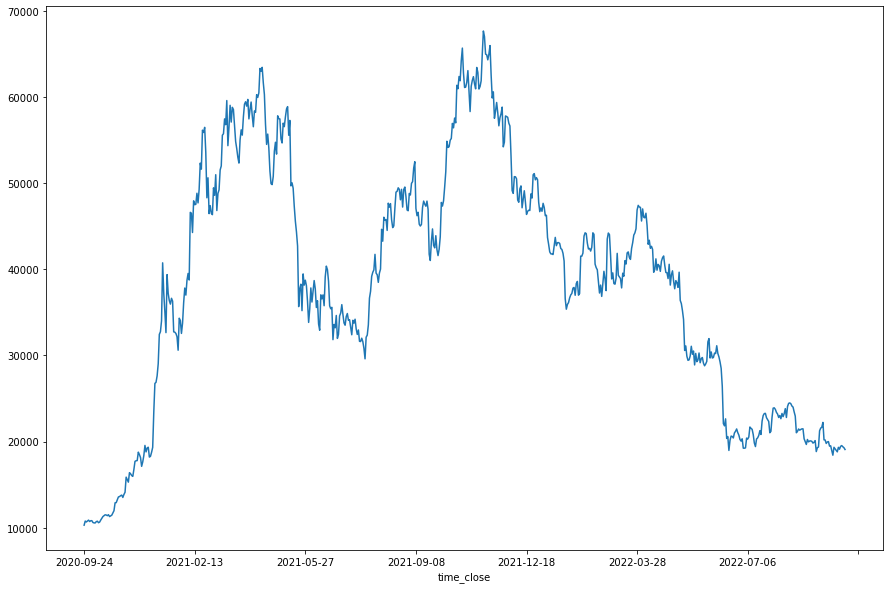

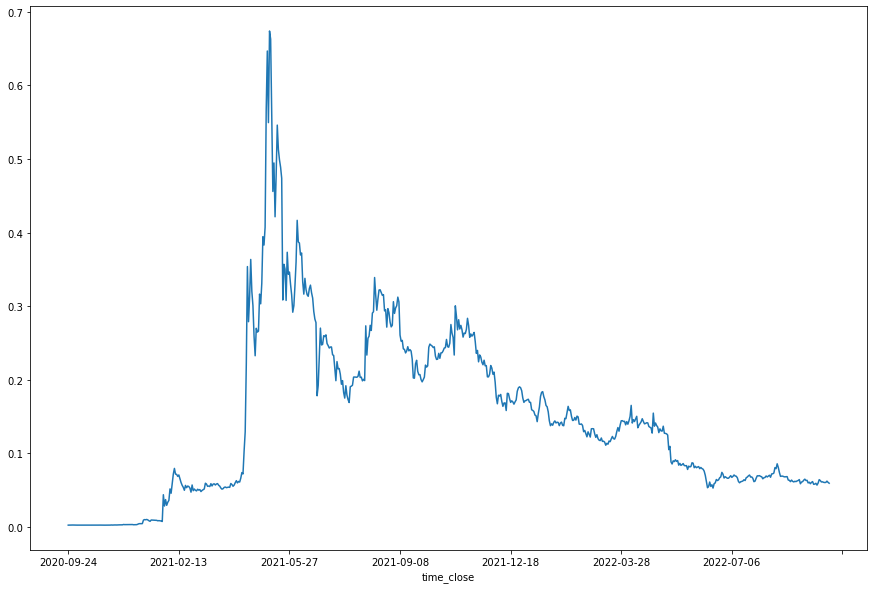

In [121]:
#Test of stationary
from statsmodels.tsa.stattools import adfuller

#ADF statistic to check stationarity
names = ['tomorrow change','volume','SPY','VIX','10Y Treasury','Gold','Oil','EUR_USD','ETH_close','BTC_close','DOGE_close']
for i in names:
    timeseries = c_xpr[i].dropna()
    result = adfuller(timeseries)
    plt.figure(figsize=(15, 10))
    ax = timeseries.plot(secondary_y=False, logy=False)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('\n')

In [122]:
# Tomorrow change and volume exhibits the property of stationary(p value is close to 0).

In [123]:
# Applying percentage change to non-stationary variables.
c_xpr['SPY_change']=c_xpr['SPY'].pct_change()
c_xpr['10Y Treasury_change']=c_xpr['10Y Treasury'].pct_change()
c_xpr['Gold_change']=c_xpr['Gold'].pct_change()
c_xpr['Oil_change']=c_xpr['Oil'].pct_change()
c_xpr['EUR_USD_change']=c_xpr['EUR_USD'].pct_change()
c_xpr['ETH_change']=c_xpr['ETH_close'].pct_change()
c_xpr['BTC_change']=c_xpr['BTC_close'].pct_change()
c_xpr['DOGE_change']=c_xpr['DOGE_close'].pct_change()
c_xpr

,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,...,BTC_close,DOGE_close,SPY_change,10Y Treasury_change,Gold_change,Oil_change,EUR_USD_change,ETH_change,BTC_change,DOGE_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,0.222924,1.676911e+09,1.005329e+10,9,24,3,1,-0.045198,-0.050177,0.040102,...,10295.054804,0.002575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,0.231864,1.894452e+09,1.045644e+10,9,25,4,1,0.040102,0.129727,0.049036,...,10773.534000,0.002629,0.016167,-0.010511,-0.005674,-0.001488,0.001261,0.078154,0.046477,0.021075
2020-09-26,0.243233,1.809125e+09,1.096918e+10,9,26,5,0,0.049036,-0.045041,-0.000456,...,10668.141934,0.002701,0.000000,0.000000,0.000000,0.000000,0.000000,0.010122,-0.009782,0.027243
2020-09-27,0.243122,1.553187e+09,1.096418e+10,9,27,6,0,-0.000456,-0.141471,0.005170,...,10769.604523,0.002722,0.000000,0.000000,0.000000,0.000000,0.000000,0.021704,0.009511,0.007860
2020-09-28,0.244379,1.424797e+09,1.102087e+10,9,28,0,1,0.005170,-0.082662,-0.007553,...,10881.984006,0.002736,0.016609,0.006070,0.008128,0.008696,-0.003246,-0.002503,0.010435,0.005012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.447573,2.661456e+09,2.233421e+10,9,29,3,1,0.004518,-0.044092,0.073597,...,19445.124438,0.060484,-0.020889,0.011336,-0.001144,-0.011199,0.011669,0.000887,0.017353,-0.003809
2022-09-30,0.480514,3.505904e+09,2.397795e+10,9,30,4,1,0.073597,0.317288,-0.010923,...,19532.627889,0.060628,-0.015464,0.015212,0.002352,-0.021421,0.012503,0.002108,0.004500,0.002384
2022-10-01,0.475265,1.032952e+10,2.371604e+10,10,1,5,0,-0.010923,1.946322,-0.000385,...,19400.000434,0.062382,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006693,-0.006790,0.028931


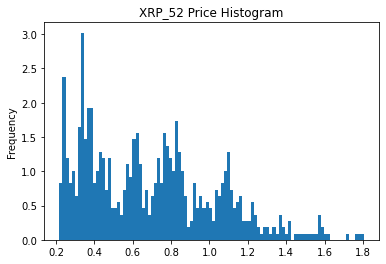

In [124]:
# Histogram using Pandas
c_xpr['close'].plot.hist(density=1,bins=100) 
plt.title('XRP_52 Price Histogram')
plt.show() 

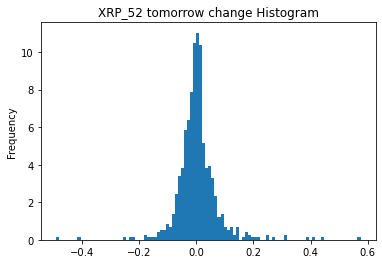

In [125]:
c_xpr['tomorrow change'].plot.hist(density=1,bins=100) 
plt.title('XRP_52 tomorrow change Histogram')
plt.show() 

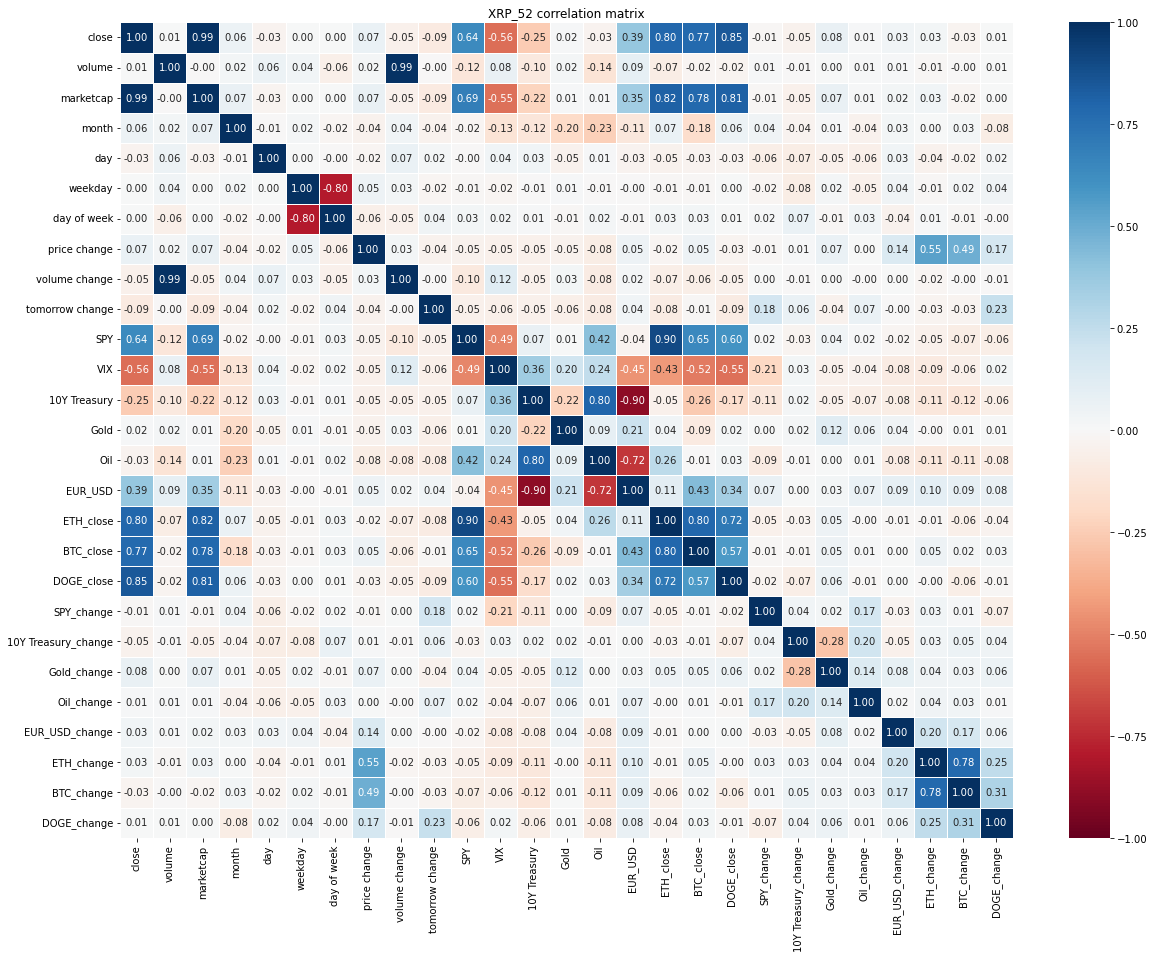

In [126]:
fig, ax = plt.subplots(figsize = (20, 15))
corrmat = c_xpr.corr()
sns.heatmap(corrmat, cmap="RdBu", linewidths=.5, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('XRP_52 correlation matrix')
plt.show()

In [127]:
c_xpr.drop(c_xpr.head(1).index, inplace=True)
c_xpr.head()

,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,...,BTC_close,DOGE_close,SPY_change,10Y Treasury_change,Gold_change,Oil_change,EUR_USD_change,ETH_change,BTC_change,DOGE_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,0.231864,1.894452e+09,1.045644e+10,9,25,4,1,0.040102,0.129727,0.049036,...,10773.534000,0.002629,0.016167,-0.010511,-0.005674,-0.001488,0.001261,0.078154,0.046477,0.021075
2020-09-26,0.243233,1.809125e+09,1.096918e+10,9,26,5,0,0.049036,-0.045041,-0.000456,...,10668.141934,0.002701,0.000000,0.000000,0.000000,0.000000,0.000000,0.010122,-0.009782,0.027243
2020-09-27,0.243122,1.553187e+09,1.096418e+10,9,27,6,0,-0.000456,-0.141471,0.005170,...,10769.604523,0.002722,0.000000,0.000000,0.000000,0.000000,0.000000,0.021704,0.009511,0.007860
2020-09-28,0.244379,1.424797e+09,1.102087e+10,9,28,0,1,0.005170,-0.082662,-0.007553,...,10881.984006,0.002736,0.016609,0.006070,0.008128,0.008696,-0.003246,-0.002503,0.010435,0.005012
2020-09-29,0.242533,1.709543e+09,1.094703e+10,9,29,1,1,-0.007553,0.199850,-0.002013,...,10719.833837,0.002673,-0.005446,-0.027149,0.011480,-0.032266,0.003737,-0.008407,-0.014901,-0.022978


In [128]:
#X = c_xpr[['volume change','SPY_change','10Y Treasury_change','Gold_change','Oil_change', 'EUR_USD_change','ETH_change','BTC_change','DOGE_change']]
X = c_xpr[['SPY_change','10Y Treasury_change','Oil_change','ETH_change','BTC_change','DOGE_change','VIX','volume change']]
y = c_xpr['tomorrow change'].copy()
y
X

,SPY_change,10Y Treasury_change,Oil_change,ETH_change,BTC_change,DOGE_change,VIX,volume change
time_close,,,,,,,,
2020-09-25,0.016167,-0.010511,-0.001488,0.078154,0.046477,0.021075,26.379999,0.129727
2020-09-26,0.000000,0.000000,0.000000,0.010122,-0.009782,0.027243,26.379999,-0.045041
2020-09-27,0.000000,0.000000,0.000000,0.021704,0.009511,0.007860,26.379999,-0.141471
2020-09-28,0.016609,0.006070,0.008696,-0.002503,0.010435,0.005012,26.190001,-0.082662
2020-09-29,-0.005446,-0.027149,-0.032266,-0.008407,-0.014901,-0.022978,26.270000,0.199850
...,...,...,...,...,...,...,...,...
2022-09-29,-0.020889,0.011336,-0.011199,0.000887,0.017353,-0.003809,31.840000,-0.044092
2022-09-30,-0.015464,0.015212,-0.021421,0.002108,0.004500,0.002384,31.620001,0.317288
2022-10-01,0.000000,0.000000,0.000000,-0.006693,-0.006790,0.028931,31.620001,1.946322


In [129]:

#xpr.assign(label = label)
#xpr
#xpr['label'] = pd.Series(label)     
#xpr

In [130]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = False)
scaler = StandardScaler()
normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
model = LinearRegression().fit(normalize_X_train,y_train)
normalize_X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)
y_test_pred = model.predict(normalize_X_test)
y_test_pred
                      

array([-0.07703222, -0.0053632 , -0.01060386,  0.00058685, -0.00295763,
        0.02355308, -0.01519958,  0.00954434,  0.03498988,  0.04147805,
        0.00817459, -0.00428152, -0.00190993, -0.01756449, -0.01093339,
        0.03980941, -0.02439673,  0.00305763,  0.00010646,  0.00470604,
        0.01337431, -0.01665937, -0.03556206, -0.04338125,  0.00087333,
       -0.00088918, -0.05398189,  0.01341389,  0.01847212, -0.05562262,
        0.00268667, -0.00241196,  0.00577784, -0.006678  ,  0.03657552,
       -0.00698228,  0.00868175,  0.04986407, -0.0016756 , -0.00249303,
        0.01119516, -0.03249974, -0.01107996, -0.01806088,  0.01200569,
        0.00795493, -0.00126314,  0.0006112 , -0.0224229 ,  0.00561807,
        0.03063608, -0.00384705,  0.00050085,  0.00048048, -0.02081236,
       -0.02271036, -0.00861589, -0.01177691,  0.02885635, -0.00228933,
       -0.00730392, -0.00384416,  0.03385406,  0.00735859,  0.0062823 ,
       -0.0216791 ,  0.00216348,  0.00234293,  0.00591653, -0.01

In [131]:
y_test_pred.shape

(138,)

In [132]:
model.coef_

array([ 0.01447176,  0.00339465,  0.00275342, -0.00272007, -0.00704631,
        0.02328456, -0.00307372,  0.00030648])

In [133]:
model.score(normalize_X_test,y_test)

0.05882473973548652

              Actual  Predicted
time_close                     
2022-05-18 -0.067714  -0.077032
2022-05-19  0.034429  -0.005363
2022-05-20 -0.032047  -0.010604
2022-05-21  0.011631   0.000587
2022-05-22  0.022058  -0.002958
...              ...        ...
2022-09-29  0.073597  -0.041194
2022-09-30 -0.010923  -0.030331
2022-10-01 -0.000385   0.000502
2022-10-02 -0.046171  -0.005251
2022-10-03  0.008401  -0.003034

[138 rows x 2 columns]
Coefficient of determination: 0.06


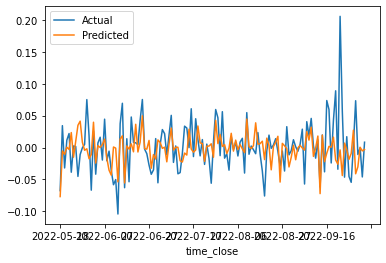

In [134]:
xpr_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred.squeeze()})
print(xpr_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_test_pred))
ax = xpr_pred.plot()

In [135]:
#SVM

In [143]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
model1 = svm.SVR(kernel = 'poly')
model1.fit(normalize_X_train,y_train)
model1.score(normalize_X_train,y_train)
y_pred1 = model1.predict(normalize_X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred1)))
print(r2_score(y_test, y_pred1))

0.5934252144855628
-0.40890986804742147


In [ ]:
#Logistic Regression 

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
c_xpr.loc[c_xpr['tomorrow change'] < 0, 'tomorrow change_binary'] = 0
c_xpr.loc[c_xpr['tomorrow change'] > 0, 'tomorrow change_binary'] = 1
c_xpr.loc[c_xpr['price change'] < 0, 'price change_binary'] = 0
c_xpr.loc[c_xpr['price change'] > 0, 'price change_binary'] = 1
list = ['SPY_change','10Y Treasury_change','Oil_change','ETH_change','BTC_change','DOGE_change','Gold_change']
for i in list:
    c_xpr.loc[c_xpr[i] < 0, i+'_binary'] = 0
    c_xpr.loc[c_xpr[i] > 0, i+'_binary'] = 1
    c_xpr.loc[c_xpr[i] == 0, i+'_binary'] = 1
c_xpr

,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,...,DOGE_change,tomorrow change_binary,price change_binary,SPY_change_binary,10Y Treasury_change_binary,Oil_change_binary,ETH_change_binary,BTC_change_binary,DOGE_change_binary,Gold_change_binary
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,0.231864,1.894452e+09,1.045644e+10,9,25,4,1,0.040102,0.129727,0.049036,...,0.021075,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2020-09-26,0.243233,1.809125e+09,1.096918e+10,9,26,5,0,0.049036,-0.045041,-0.000456,...,0.027243,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2020-09-27,0.243122,1.553187e+09,1.096418e+10,9,27,6,0,-0.000456,-0.141471,0.005170,...,0.007860,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-09-28,0.244379,1.424797e+09,1.102087e+10,9,28,0,1,0.005170,-0.082662,-0.007553,...,0.005012,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-09-29,0.242533,1.709543e+09,1.094703e+10,9,29,1,1,-0.007553,0.199850,-0.002013,...,-0.022978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.447573,2.661456e+09,2.233421e+10,9,29,3,1,0.004518,-0.044092,0.073597,...,-0.003809,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2022-09-30,0.480514,3.505904e+09,2.397795e+10,9,30,4,1,0.073597,0.317288,-0.010923,...,0.002384,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2022-10-01,0.475265,1.032952e+10,2.371604e+10,10,1,5,0,-0.010923,1.946322,-0.000385,...,0.028931,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [140]:
#Train test split
X = c_xpr[['weekday','price change_binary','BTC_change_binary','ETH_change_binary','DOGE_change_binary','SPY_change_binary','Gold_change_binary','Oil_change_binary']]
y = c_xpr['tomorrow change_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=False)
X_train

,weekday,price change_binary,BTC_change_binary,ETH_change_binary,DOGE_change_binary,SPY_change_binary,Gold_change_binary,Oil_change_binary
time_close,,,,,,,,
2020-09-25,4,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2020-09-26,5,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2020-09-27,6,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-09-28,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2020-09-29,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2022-05-13,4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2022-05-14,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-05-15,6,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [141]:
logisticRegr = LogisticRegression()
model2 = logisticRegr.fit(X_train, y_train)
y_pred2=logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.6376811594202898


In [99]:
#resid = y_test-y_test_pred  #by hand
   

In [100]:
#statsmodels.stats.stattools.durbin_watson(model.resid)

AttributeError: 'LinearRegression' object has no attribute 'resid'

In [101]:
#df1 = [normalize_X_train,y_train]
#y_train
#print(type(y_train))
#print(type(normalize_X_train))

In [102]:
#normalize_X_train

In [103]:
#normalize_X_train['y_train'] = y_train
#normalize_X_train
#df1 = pd.merge(normalize_X_train, y_train, right_index = True,
               #left_index = True)
#df1 = normalize_X_train.assign(y1_train = y_train)
#df1_y_train = pd.DataFrame (y_train)
#df1 = normalize_X_train.join(df1_y_train)
#df1_y_train
#df1
#df1_y_train.isnull().sum()

In [104]:
#print(df1_y_train)

In [105]:
#print(df1_y_train.dtype)
#normalize_X_train.SPY = normalize_X_train.SPY.astype(float)
#normalize_X_train.VIX = normalize_X_train.VIX.astype(float)
#normalize_X_train['10Y Treasury'] = normalize_X_train['10Y Treasury'].astype(float)
#normalize_X_train.Gold = normalize_X_train.Gold.astype(float)
#normalize_X_train.Oil = normalize_X_train.Oil.astype(float)
#normalize_X_train.EUR_USD = normalize_X_train.EUR_USD.astype(float)
#df1_y_train['tomorrow change'] = df1_y_train['tomorrow change'].astype(float)
#df_con['Quantity'] = df_con['Quantity'].astype(float)

In [106]:
#df1 = normalize_X_train.join(df1_y_train)
#df1

In [107]:
#df1['tomorrow change'] = y_train
#df1

In [108]:
import statsmodels.formula.api as smf
reg = smf.ols('close ~ volume+SPY+VIX+Gold+Oil+EUR_USD', data = xpr)
res = reg.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.86e-128
Time:                        13:41:44   Log-Likelihood:                 71.260
No. Observations:                 689   AIC:                            -128.5
Df Residuals:                     682   BIC:                            -96.77
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4043      0.298    -11.438      0.0

In [109]:
#regressin tree
from sklearn.tree import DecisionTreeRegressor

In [110]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [111]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [112]:
#classification tree
for i in range(len(y)):
    if y[i] > 0.05:
        y[i]= 3
    if (y[i] <0.05) &(y[i]>=0):
        y[i] = 2
    if (y[i]<0) & (y[i]>-0.05):
        y[i] = 1
    if y[i]<=-0.05:
        y[i] = 0
#y  
label = y
label


/tmp/ipykernel_181/2223393452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]= 3
/tmp/ipykernel_181/2223393452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 2


time_close
2020-09-25    3.0
2020-09-26    2.0
2020-09-27    3.0
2020-09-28    2.0
2020-09-29    2.0
             ... 
2022-09-29    3.0
2022-09-30    2.0
2022-10-01    2.0
2022-10-02    2.0
2022-10-03    3.0
Name: tomorrow change_binary, Length: 688, dtype: float64

In [113]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, label_train, label_test = train_test_split(X, label, test_size=0.33, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, label_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [114]:
y_hat = tree_clf.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix, classification_report


In [105]:
print(confusion_matrix(label_test, y_hat))


[[12  4  7  0]
 [21 12 54  0]
 [17 14 50  0]
 [14  6 17  0]]


In [106]:
confusion_matrix(label_test, y_hat).sum()


228

In [107]:
len(label_test)

228

In [108]:
print(classification_report(label_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.19      0.52      0.28        23
         1.0       0.33      0.14      0.20        87
         2.0       0.39      0.62      0.48        81
         3.0       0.00      0.00      0.00        37

    accuracy                           0.32       228
   macro avg       0.23      0.32      0.24       228
weighted avg       0.28      0.32      0.27       228



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
